### The HJB equation:

\begin{align*}
-\partial_t\phi(x,t) + \max\{-V(x,t;a)\cdot\nabla\phi(x,t)-l(x,t,a,\rho)\}=\sigma\Delta\phi(x,t)
\end{align*}

We have:

\begin{cases}
\mathrm{d}y = V(y,s,\alpha,\rho)\mathrm{d}t+\sqrt{2\sigma}\mathrm{d}W_s\\
y(t) = x
\end{cases}
The cost function is
$$
J(x,t) = \int_{t}^{T}l(y,s,\alpha,\rho)\mathrm{d}s+g(y(T)).
$$

### The semi-Lagrangian scheme:

\begin{align*}
\phi(x,t^n) = \min\{&\int_{t^n}^{t^{n+1}} l(x,s,a,\rho)\mathrm{d}s\\
&+\frac{1}{2}(\phi(x+V\Delta t+\sqrt{2\sigma}\sqrt{\Delta t}, t^{n+1})+\phi(x+V\Delta t-\sqrt{2\sigma}\sqrt{\Delta t}, t^{n+1}))\}\\
= \min\{& l(x,t^{n+1},a,\rho)\Delta t\\
&+\frac{1}{2}(\phi(x+V\Delta t+\sqrt{2\sigma}\sqrt{\Delta t}, t^{n+1})+\phi(x+V\Delta t-\sqrt{2\sigma}\sqrt{\Delta t}, t^{n+1}))\}
\end{align*}

Here, I consider $2d$ case. For simplicity, here I use 
$$
x=(x_1,x_2)\\
(V\Delta t+\sqrt{2\sigma\Delta t})^2 = (V\Delta t+\sqrt{2\sigma\Delta t})\cdot(V\Delta t+\sqrt{2\sigma\Delta t})
$$ 

By Taylor, we have 

\begin{cases}
&\phi(x+V\Delta t+\sqrt{2\sigma\Delta t}, t^{n+1})=\phi(x, t^{n+1})+\nabla\phi(x,t^{n+1})\cdot(V\Delta t+\sqrt{2\sigma\Delta t})\\
&+\frac{1}{2}(\partial_{x_1x_1}\phi(x,t^{n+1})+2\partial_{x_1x_2}\phi(x,t^{n+1})+\partial_{x_2x_2}\phi(x,t^{n+1}))(V\Delta t+\sqrt{2\sigma\Delta t})^2\\[10pt]
&\phi(x+V\Delta t-\sqrt{2\sigma\Delta t}, t^{n+1})=\phi(x, t^{n+1})+\nabla\phi(x,t^{n+1})\cdot(V\Delta t-\sqrt{2\sigma\Delta t})\\
&+\frac{1}{2}(\partial_{x_1x_1}\phi(x,t^{n+1})+2\partial_{x_1x_2}\phi(x,t^{n+1})+\partial_{x_2x_2}\phi(x,t^{n+1}))(V\Delta t-\sqrt{2\sigma\Delta t})^2
\end{cases}

Adding these last two terms, we have

\begin{align*}
&\frac{1}{2}((V^2\Delta t^2+2\sqrt{2\sigma\Delta t}V\Delta t+2\sigma\Delta t)+(V^2\Delta t^2-2\sqrt{2\sigma\Delta t}V\Delta t+2\sigma\Delta t))\cdot(\Delta\phi(x,t^{n+1}))\\
&=(V^2\Delta t^2+2\sigma\Delta t)(\Delta\phi(x,t^{n+1}))\\
&=2\sigma\Delta t(\Delta\phi(x,t^{n+1}))+o(\Delta t)^2
\end{align*}

 Adding the equations, we can get
 
\begin{align*}
    \phi(x,t^n) &= \min\{\int_{t^n}^{t^{n+1}} l(x,s,a,\rho)\mathrm{d}s+(\phi(x, t^{n+1})+V\Delta t\nabla\phi(x,t^{n+1}) + \sigma\Delta t\Delta\phi(x,t^{n+1}))\}\\
    &=\min\{l(x, t^{n+1})\Delta t+(\phi(x, t^{n+1})+V\Delta t\nabla\phi(x,t^{n+1}) + \sigma\Delta t\Delta\phi(x,t^{n+1}))\}
\end{align*}

Dividing $\Delta t$, we can get

\begin{align*}
-\frac{\phi(x,t^{n+1})-\phi(x,t^n)}{\Delta t} + \max\{-V\nabla\phi(x,t^{n+1})-l(x, t^{n+1})\} = \sigma\Delta\phi(x,t^{n+1})
\end{align*}

### Lagrange-Galerkin Scheme for the Fokker-Planck equation

We consider the Fokker–Planck equation:

\begin{align*}
\partial_s \rho(y,s) + \nabla \cdot \left( \rho(y,s)\, V(y,s; \alpha^*, \rho) \right) = \sigma \Delta \rho(y,s), & y \in \mathbb{R}^2,\ s \in (0,T), \\
\rho(y,0) = \rho_0(y), & y \in \mathbb{R}^2.
\end{align*}

The corresponding stochastic process $y(s)$ is defined by the Itô SDE:

\begin{cases}
\mathrm{d}y(s) = V(y(s), s; \alpha, \rho)\, \mathrm{d}s + \sqrt{2\sigma}\, \mathrm{d}W_s
\end{cases}

Using the Euler-Maruyama method, we define the discrete-time approximation $Y_k$ by:

\begin{align*}
Y_{k} = x + \Delta s \cdot V(Y_k, s_k; \alpha_k, \rho_k) + \sqrt{2\sigma\, \Delta s} \cdot \xi_k,
\end{align*}

where $\xi_k \sim \mathcal{N}(0, I)$ are i.i.d. standard Gaussian random vectors in $\mathbb{R}^2$.  (Mostly, I can use $P(\xi_k=\pm 1)=1/2$)


Here is the semi-discrete approximation:

\begin{align*}
\rho_{k+1} &= Y_k \sharp \rho_k, \\
\rho_0 &= \rho_0,
\end{align*}

or, equivalently, for every test function $\phi:\mathbb{R}^d \to \mathbb{R}$, we have

\begin{align*}
\int_{\mathbb{R}^d} \phi(x)\, \rho_{k+1}(x)\, dx = \int_{\mathbb{R}^d} \phi(Y_k(x))\, \rho_k(x)\, dx.
\end{align*}


Here we consider the finite element basis $\{\beta_i\}$, given the regular mesh defined by $\{E_i\}$

\begin{align*}
E_i = \{x\in\mathbb{R}^d, |x-x_i|_{\infty}\leq\frac{\Delta x}{2}\}.
\end{align*}

And we define

\begin{align*}
\rho_{0,i}=\frac{1}{(\Delta x)^d}\int_{E_i}\rho_0(x)\mathrm{d}x
\end{align*}

 We look for an approximation:

\begin{align*}
\rho(t_k, x) = \sum\limits_{i}\rho_{k,i}\beta_i(x)
\end{align*}

We take $\phi(x) = \beta_i(x)$ to obtain the following equations

\begin{align*}
\sum\limits_{j}\rho_{k+1,j}\int\beta_{j}(x)\beta_i(x)\mathrm{d}x = \sum\limits_{j}\rho_{k,j}\int\beta_j(x)\beta_i(Y_k(x))\mathrm{d}x
\end{align*}

In this section, I will take this basis: $\beta_i:=\mathbb{I}_{E_i}$. So the LG scheme will be:

\begin{align*}
\rho_{k+1} = B_k\rho_k,
\end{align*}

where

\begin{align*}
B_{i,j} = \beta_i(y_k(x_j)).
\end{align*}

In [192]:
import sys
import copy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
np.set_printoptions(threshold=np.inf, linewidth=200, suppress=True)

In [193]:
T = 0.5
Nt = 50
dt = T / Nt

sigma = 0.05

Nx = 41
Ny = 41
x = np.linspace(0, 1, Nx)
y = np.linspace(0, 1, Ny)
X, Y = np.meshgrid(x, y)
dx = x[1] - x[0]
dy = y[1] - y[0]

K = 32  # number of boundary points
theta = np.linspace(0, 2 * np.pi, K, endpoint=False) 
alphas = np.stack((np.cos(theta), np.sin(theta)), axis=1)  # (K, 2) array

phi = np.zeros((len(x), len(y), Nt))
rho = np.zeros((len(x), len(y), Nt))


x_mask = (x >= 0.1) & (x <= 0.25)
y_mask = (y >= 0.1) & (y <= 0.25)

def l(rho):
    return 3*rho

def g(x, y):
    return np.sqrt((x-0.5)**2 + (y-0.5)**2)

def V(alpha):
    return alpha

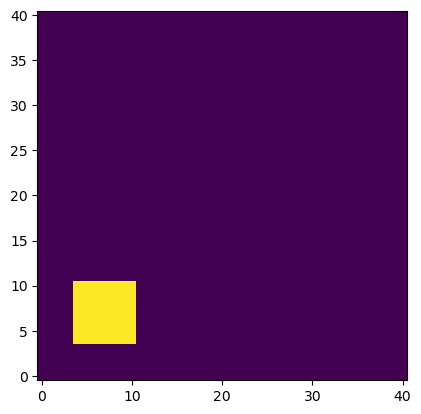

In [194]:
"""   
Initial Guess for rho
rho(t=0) = rho(t=0.1) = rho(t=0.2) = ....
"""
rho[np.ix_(x_mask, y_mask)] = 0.4   # Initial guess for rho
plt.imshow(rho[:, :, 0], origin='lower', cmap='viridis') 

In [195]:
phi[:, :, -1] = g(X, Y)
alpha = np.zeros((Nx, Ny, Nt-1, 2))
rho_old = copy.deepcopy(rho)
for iter in range(10):
    for t in range(Nt-1, 0, -1):
        s1 = np.zeros((K, 2)) # phi(x+s1)
        s2 = np.zeros((K, 2)) # phi(x+s2)
        Vs = np.zeros((K,2))
        s1 = V(alphas)*dt + np.sqrt(2*dt*sigma)
        s2 = V(alphas)*dt - np.sqrt(2*dt*sigma)

        N = Nx * Ny
        grid_points = np.stack([X.ravel(), Y.ravel()], axis=1)  # shape: (N, 2)

        grid_points_expanded = grid_points[:, None, :]

        s1_expanded = s1[None, :, :]                        

        all_points1 = grid_points_expanded + s1_expanded        # shape: (N, k, 2)
        all_points1 = all_points1.reshape(-1, 2)                # shape: (K*N, 2)


        s2_expanded = s2[None, :, :]
        all_points2 = grid_points_expanded + s2_expanded        # shape: (N, k, 2)
        all_points2 = all_points2.reshape(-1, 2)                # shape: (K*N, 2)

        def soft_penalty(p):
            p = np.array(p)
            clipped_p = np.clip(p, [x[0], y[0]], [x[-1], y[-1]])
            distance = np.linalg.norm(clipped_p - p)
            interp_val = v_interp_raw(clipped_p)
            return interp_val + 100*distance**2

        v_interp_raw = RegularGridInterpolator((x, y), phi[:,:,t],  bounds_error=False, fill_value=None)
        H = 1/2 * (soft_penalty(all_points1) + soft_penalty(all_points2))
        H = H.reshape(Nx, Ny, K)
        H_val = np.min(H, axis=2)  # shape: (Nx, Ny)
        alpha_index = np.argmin(H, axis=2)
        alpha[:, :, t-1, :] = alphas[alpha_index]

        phi[:, :, t-1] = H_val + l(rho[:, :, t]) * dt

    points = grid_points.reshape((Nx, Ny, 2))
    for k in range(Nt-1):
    # Reshape
        Y_k1 = (points+alpha[:,:,k,:]*dt+1/2*np.sqrt(2*sigma*dt))
        Y_k2 = (points+alpha[:,:,k,:]*dt-1/2*np.sqrt(2*sigma*dt))
        P = Nx * Ny
        points_flat = points.reshape(P, 2)
        Y1_flat = Y_k1.reshape(P, 2)
        Y2_flat = Y_k2.reshape(P, 2)
        rho_flat = rho[:, :, k].reshape(P)

        # ∞-norm difference
        diff1 = np.abs(points_flat[:, None, :] - Y1_flat[None, :, :])
        diff2 = np.abs(points_flat[:, None, :] - Y2_flat[None, :, :])

        # Max-norm (∞-norm)
        dist1 = np.max(diff1, axis=2)
        dist2 = np.max(diff2, axis=2)

        # Apply β as box function
        B1 = (dist1 < 0.5 * dx).astype(float)
        B2 = (dist2 < 0.5 * dx).astype(float)

        # Weighted sum
        rho_new_flat = 0.5 * (B1 @ rho_flat + B2 @ rho_flat)
        rho[:, :, k+1] = rho_new_flat.reshape(Nx, Ny)

    rho = .1*rho + .9*rho_old
    print(np.max(np.abs(rho-rho_old)))
    rho_old = copy.deepcopy(rho)

0.8428178779999058
0.6607400709151569
0.4519544979901964
0.33623048954837387
0.3705517397315334
0.2074522236508276
0.3062421947240893
0.24071690864195405
0.22227125305967332
0.19794611056561323


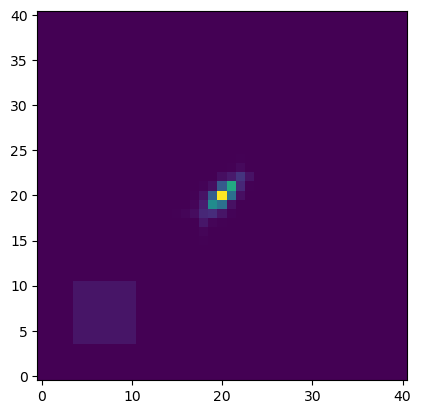

In [196]:
plt.imshow(rho[:, :, -1], origin='lower', cmap='viridis') 

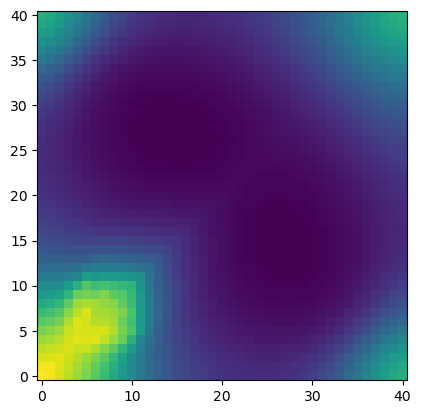

In [199]:
plt.imshow(phi[:, :, 0], origin='lower', cmap='viridis') 

In [197]:
# points = grid_points.reshape((Nx, Ny, 2))
# def betaij(points, i):
#     if np.max(np.abs(points - i))< .5 * dx:
#         return 1
#     else: return 0
# for k in range(Nt-1):
#     Y_k1 = (points+alpha[:,:,k,:]*dt+1/2*np.sqrt(2*sigma*dt))
#     Y_k2 = (points+alpha[:,:,k,:]*dt-1/2*np.sqrt(2*sigma*dt))
#     for i1 in range(Nx):
#         for i2 in range(Ny):
#             sum1 = 0
#             sum2 = 0
#             for j1 in range(Nx):
#                 for j2 in range(Ny):
#                     sum1 += betaij(Y_k1[j1,j2,:], points[i1,i2,:])*rho[j1,j2,k]
#                     sum2 += betaij(Y_k2[j1,j2,:], points[i1,i2,:])*rho[j1,j2,k]
#             rho[i1,i2,k+1] = 1/2 * (sum1+sum2)